Project 2: Global Health Statistics Data Analysis
Let's break down the steps to analyze global health data. The main objectives include:

* Visualizing Health Indicators by Country: Visualize mortality rates, life expectancy, and other health indicators across countries.

* Identifying Correlations Between Health Indicators and Standard of Living: Explore how various health indicators relate to factors like GDP, life expectancy, etc.

* Creating Interactive Maps of Health Data: Visualize health data geographically by creating interactive maps.

Load and Explore the Dataset

In [4]:
import pandas as pd

In [5]:
# Load the dataset
df = pd.read_csv("/content/Global Health Statistics.csv")

In [6]:
# Display the first few rows to inspect the data
df.head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013.0,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007.0,...,7.58,Medication,21064.0,No,91.82,4493.0,2.16,16886.0,0.79,86.02
1,France,2002.0,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318.0,...,5.11,Surgery,47851.0,Yes,76.65,2366.0,4.82,80639.0,0.74,45.52
2,Turkey,2015.0,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878.0,...,3.49,Vaccination,27834.0,Yes,98.55,41.0,5.81,12245.0,0.41,40.20
3,Indonesia,2011.0,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224.0,...,8.44,Surgery,144.0,Yes,67.35,3201.0,2.22,49336.0,0.49,58.47
4,Italy,2013.0,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908.0,...,5.90,Medication,8908.0,Yes,50.06,2832.0,6.93,47701.0,0.50,48.14


In [7]:
# Check the column names
print(df.columns)

Index(['Country', 'Year', 'Disease Name', 'Disease Category',
       'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
       'Age Group', 'Gender', 'Population Affected', 'Healthcare Access (%)',
       'Doctors per 1000', 'Hospital Beds per 1000', 'Treatment Type',
       'Average Treatment Cost (USD)', 'Availability of Vaccines/Treatment',
       'Recovery Rate (%)', 'DALYs', 'Improvement in 5 Years (%)',
       'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)'],
      dtype='object')


In [8]:
# Check for missing data
print(df.isnull().sum())

Country                               0
Year                                  1
Disease Name                          1
Disease Category                      1
Prevalence Rate (%)                   1
Incidence Rate (%)                    1
Mortality Rate (%)                    1
Age Group                             1
Gender                                1
Population Affected                   1
Healthcare Access (%)                 1
Doctors per 1000                      1
Hospital Beds per 1000                1
Treatment Type                        1
Average Treatment Cost (USD)          1
Availability of Vaccines/Treatment    1
Recovery Rate (%)                     1
DALYs                                 1
Improvement in 5 Years (%)            1
Per Capita Income (USD)               1
Education Index                       1
Urbanization Rate (%)                 1
dtype: int64


 Handle Missing Values

In [10]:
# Removes any rows with missing data
df.dropna(inplace=True)

In [11]:
# filling categorical columns with the mode
df['Disease Category'].fillna(df['Disease Category'].mode()[0], inplace=True)

<ipython-input-11-f152495decf1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Disease Category'].fillna(df['Disease Category'].mode()[0], inplace=True)


 Visualizing Health Indicators by Country

<ipython-input-21-67290c6a5989>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




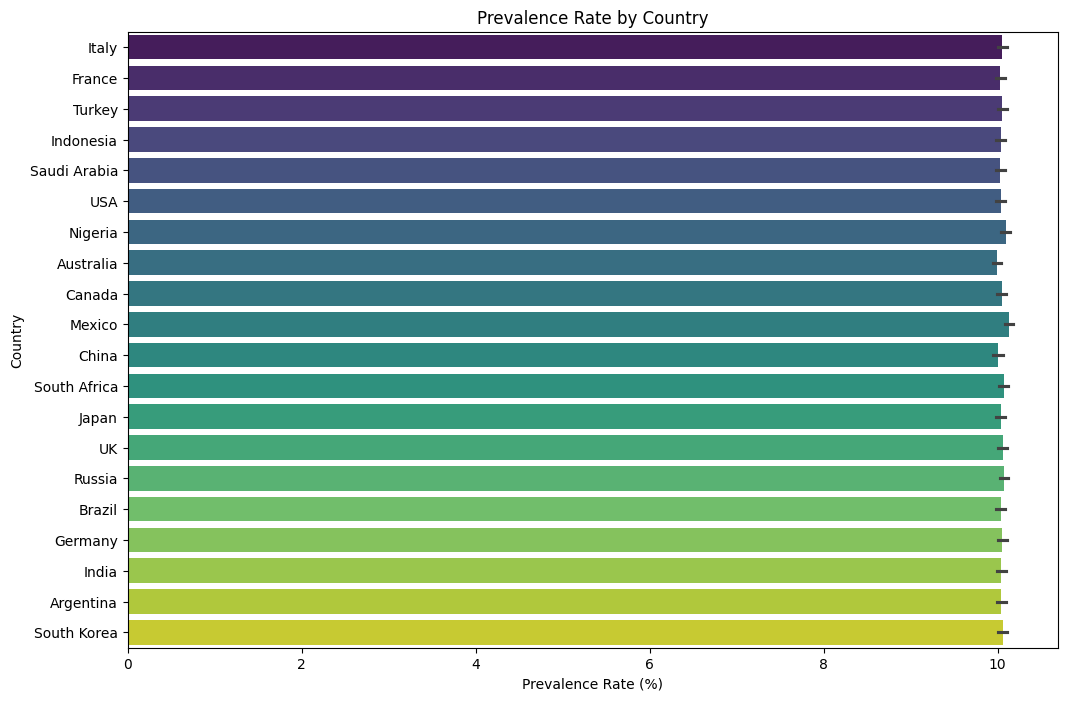

In [21]:
# Visualize the Prevalence Rate by Country

plt.figure(figsize=(12, 8))
sns.barplot(x='Prevalence Rate (%)', y='Country', data=df, palette='viridis')
plt.title('Prevalence Rate by Country')
plt.xlabel('Prevalence Rate (%)')
plt.ylabel('Country')
plt.show()

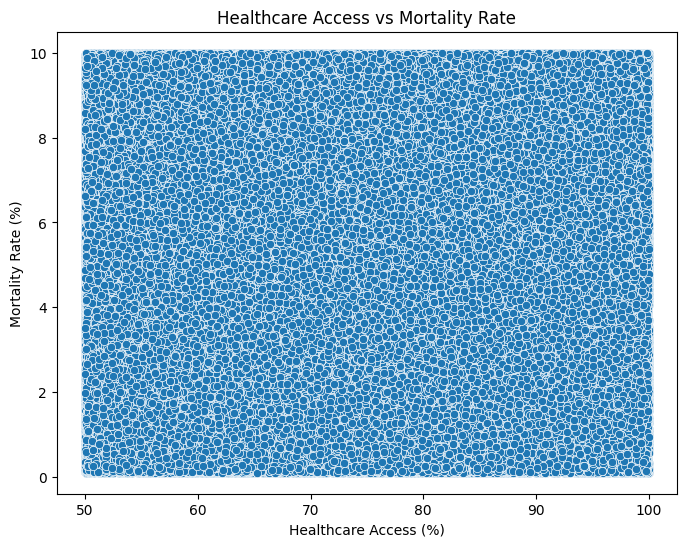

In [22]:
# Correlation Between Healthcare Access and Mortality Rate


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Healthcare Access (%)', y='Mortality Rate (%)', data=df)
plt.title('Healthcare Access vs Mortality Rate')
plt.xlabel('Healthcare Access (%)')
plt.ylabel('Mortality Rate (%)')
plt.show()


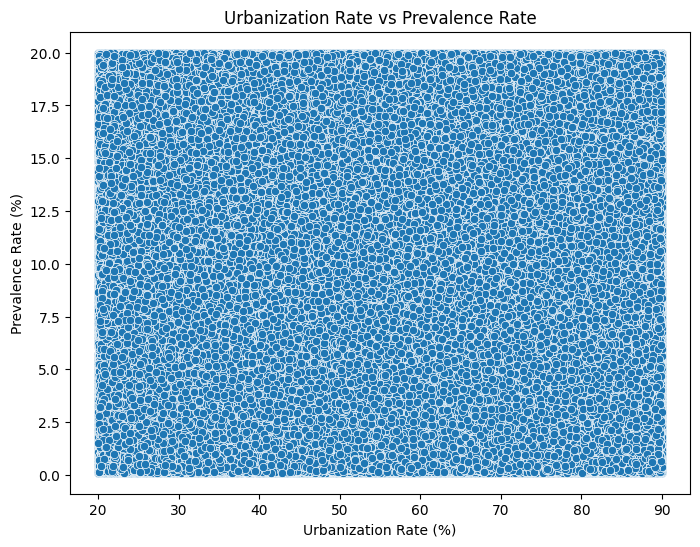

In [23]:
# Compare Urbanization Rate with Prevalence Rate

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Urbanization Rate (%)', y='Prevalence Rate (%)', data=df)
plt.title('Urbanization Rate vs Prevalence Rate')
plt.xlabel('Urbanization Rate (%)')
plt.ylabel('Prevalence Rate (%)')
plt.show()


Correlation Matrix

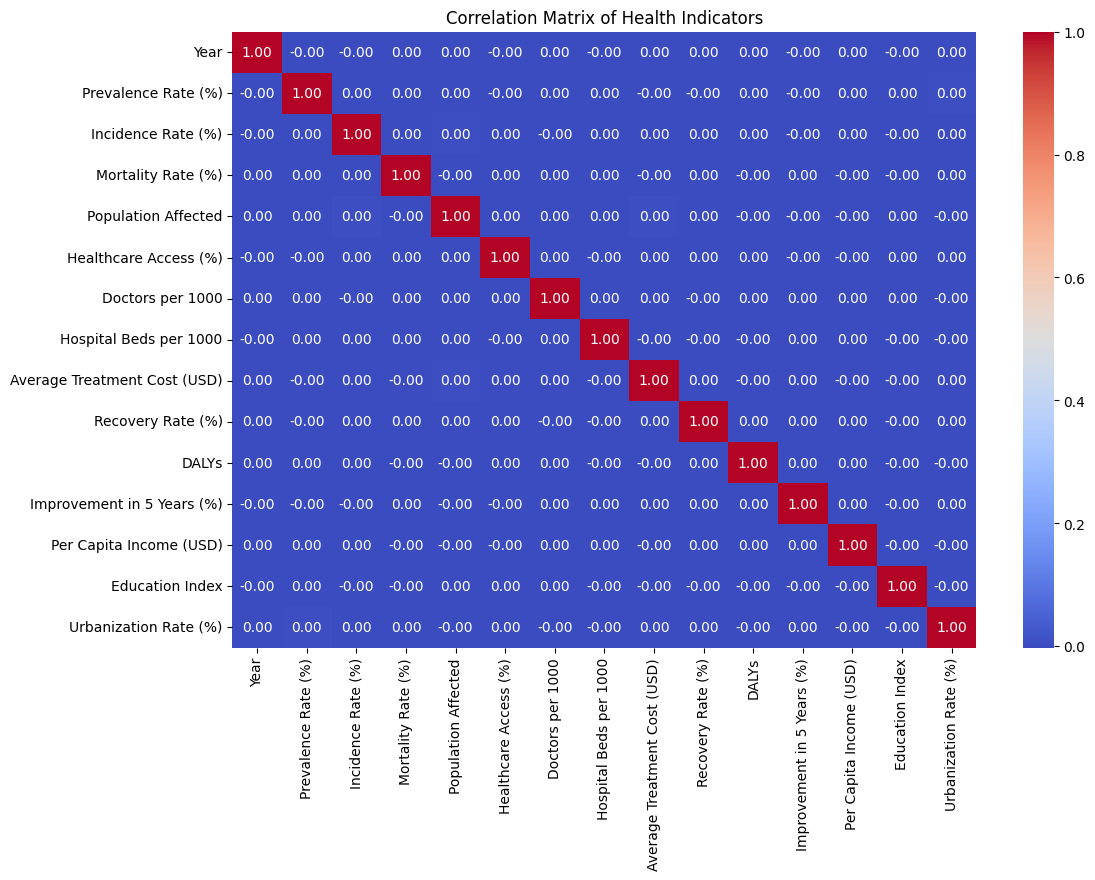

In [24]:
# Calculate the correlation matrix, excluding non-numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Health Indicators')
plt.show()


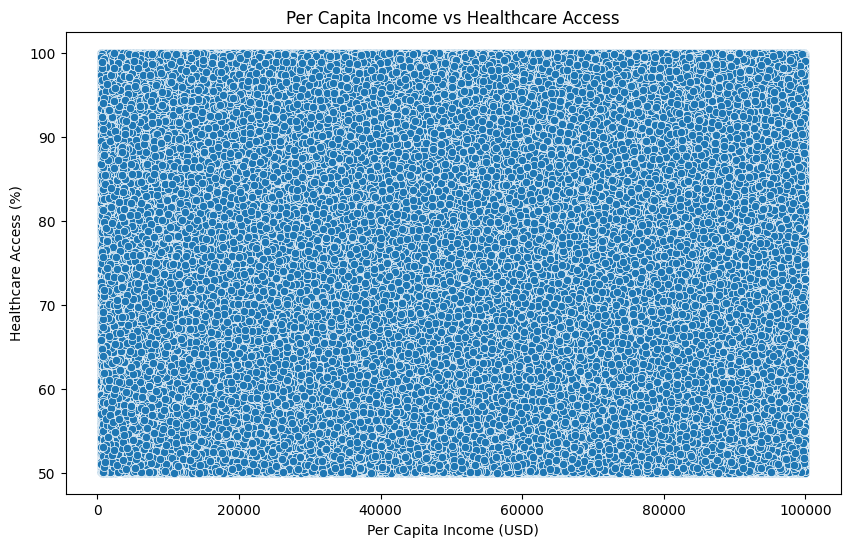

In [25]:
# Explore the relationship between income and healthcare access
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Per Capita Income (USD)', y='Healthcare Access (%)', data=df)
plt.title('Per Capita Income vs Healthcare Access')
plt.xlabel('Per Capita Income (USD)')
plt.ylabel('Healthcare Access (%)')
plt.show()
